### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 290

### Loading  and preliminary rearrangement training dataset

In [2]:
# Load dataset from file

data = pd.read_csv('INPUT/train.csv')

In [3]:
# Check rows and columns quantity 

data.shape

(1460, 81)

In [4]:
# Check first five rows of dataset

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check last five rows of dataset

data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# Remove column 'Id'

data.drop('Id', axis=1, inplace=True)

In [7]:
# Quantative part of dataset description

data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Check correlation of quantative variables of dataset

data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [9]:
# Check correlation of left hand variable and all quantative right hand variables

(np.sqrt(data.corr()**2))['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [10]:
# Average SalePrice and GrLivArea by Neighborhood

neighborhood_SalePrice = data.groupby('Neighborhood')['SalePrice'].mean()
neighborhood_GrLivArea = data.groupby('Neighborhood')['GrLivArea'].mean()
saleprice_grlivarea = neighborhood_SalePrice / neighborhood_GrLivArea

print(neighborhood_SalePrice.sort_values(ascending=False), '\n')
print(neighborhood_GrLivArea.sort_values(ascending=False), '\n')
print(saleprice_grlivarea.sort_values(ascending=False))

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64 

Neighborhood
NoRidge    2508.853659
NridgHt    1915.948052
StoneBr    1879.080000
SWISU      1801.240000
Crawfor    1791.607843
ClearCr    1788.107143
Timber     1749.368421
NWAmes     1727.780822
Gilbert    1641.316456
Somerst    1596.651163
SawyerW    1595.016949
Veenker    1539.636364
CollgCr    1480.500000
OldTown    1479.

In [11]:
# Information about dataset - quantity of non-null values and types of data by columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [12]:
# Delete columns where quantity of non-null objects is less than 10%

data = data.drop('Alley', axis=1)
data = data.drop('PoolQC', axis=1)
data = data.drop('MiscFeature', axis=1)

In [13]:
# Fill out all empty Fence by NA
# and then check the number of empty Fence

data['Fence'] = data['Fence'].fillna('NA')
data.loc[data['Fence'].isnull(), :].shape[0]

0

In [14]:
# Average LotFrontage

mean_LotFrontage = data['LotFrontage'].mean()
mean_LotFrontage

70.04995836802665

In [15]:
# Average 1stFlrSF

mean_1stFlrSF = data['1stFlrSF'].mean()
mean_1stFlrSF

1162.626712328767

In [16]:
# Average LotFrontage / Average 1stFlrSF ratio

coef_1stFlrSF_LotFrontage = mean_LotFrontage / mean_1stFlrSF
coef_1stFlrSF_LotFrontage

0.06025146130327165

In [17]:
# Fill out all empty LotFrontage as 1stFlrSF * (Average LotFrontage / Average 1stFlrSF ratio)
# and then check the number of empty LotFrontage

data.loc[data['LotFrontage'].isnull(), 'LotFrontage'] = data['1stFlrSF'] * coef_1stFlrSF_LotFrontage
data.loc[data['LotFrontage'].isnull(), :].shape[0]

0

In [18]:
# If there is no fireplace fill out all empty FireplaceQu by NA
# and then check the number of empty FireplaceQu

data.loc[data['Fireplaces'] == 0, 'FireplaceQu'] = 'NA'
data.loc[data['FireplaceQu'].isnull(), :].shape[0]

0

In [19]:
# Check type of data in the column MasVnrArea

data['MasVnrArea'].dtype

dtype('float64')

In [20]:
# Fill out all empty MasVnrArea by 0
# and then check the number of empty MasVnrArea

data.loc[data['MasVnrArea'].isnull(), 'MasVnrArea'] = 0
data.loc[data['MasVnrArea'].isnull(), :].shape[0]

0

In [21]:
# If there is no MasVnrArea fill out all empty MasVnrType by NA
# and then check the number of empty MasVnrType

data.loc[data['MasVnrArea'] == 0, 'MasVnrType'] = 'None'
data.loc[data['MasVnrType'].isnull(), :].shape[0]

0

In [22]:
# If there is no basement fill out all empty BsmtQual by NA
# and then check the number of empty BsmtQual

data.loc[(data['BsmtQual'].isnull()) & (data['BsmtCond'].isnull()) & (data['BsmtExposure'].isnull()) & \
         (data['BsmtFinType1'].isnull()) & (data['BsmtFinType2'].isnull()), 'BsmtQual'] = 'NA'
data.loc[data['BsmtQual'].isnull(), :].shape[0]

0

In [23]:
# If there is no basement fill out all empty BsmtCond by NA
# and then check the number of empty BsmtCond

data.loc[(data['BsmtCond'].isnull()) & (data['BsmtExposure'].isnull()) & (data['BsmtFinType1'].isnull()) & \
         (data['BsmtFinType2'].isnull()), 'BsmtCond'] = 'NA'
data.loc[data['BsmtCond'].isnull(), :].shape[0]

0

In [24]:
# If there is no basement fill out all empty BsmtExposure by NA
# and then check the number of empty BsmtExposure

data.loc[(data['BsmtExposure'].isnull()) & (data['BsmtFinType1'].isnull()) & (data['BsmtFinType2'].isnull()), \
         'BsmtExposure'] = 'NA'
data.loc[data['BsmtExposure'].isnull(), :].shape[0]

1

In [25]:
# Check the row where BsmtExposure is NaN

data.loc[data['BsmtExposure'].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NA,0,2,2006,WD,Normal,192500


In [26]:
# Since basement exists, fill out the empty sell by No
# and then check the number of empty BsmtExposure

data.loc[data['BsmtExposure'].isnull(), 'BsmtExposure'] = 'No'
data.loc[data['BsmtExposure'].isnull(), :].shape[0]

0

In [27]:
# If there is no basement fill out all empty BsmtFinType1 by NA
# and then check the number of empty BsmtFinType1

data.loc[(data['BsmtFinType1'].isnull()) & (data['BsmtFinType2'].isnull()), 'BsmtFinType1'] = 'NA'
data.loc[data['BsmtFinType1'].isnull(), :].shape[0]

0

In [28]:
# If there is no basement fill out all empty BsmtFinType2 by NA
# and then check the number of empty BsmtFinType2

data.loc[data['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'NA'
data.loc[data['BsmtFinType2'].isnull(), :].shape[0]

0

In [29]:
# More faster, but less reliable and more complicated for understanding way

# for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
#     data[col] = data[col].fillna('NA')

In [30]:
# Check the row where Electrical is NaN

data.loc[data['Electrical'].isnull(), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,0,5,2008,WD,Normal,167500


In [31]:
# Fill out the empty sell by SBrkr

data.loc[data['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
data.loc[data['Electrical'].isnull()].shape[0]

0

In [32]:
# If there is no garage fill out all empty GarageType by NA
# and then check the number of empty GarageType

data.loc[(data['GarageCars'] == 0) & (data['GarageArea'] == 0), 'GarageType'] = 'NA'
data.loc[data['GarageType'].isnull()].shape[0]

0

In [33]:
# If there is no garage fill out all empty GarageFinish by NA
# and then check the number of empty GarageFinish

data.loc[(data['GarageCars'] == 0) & (data['GarageArea'] == 0), 'GarageFinish'] = 'NA'
data.loc[data['GarageFinish'].isnull()].shape[0]

0

In [34]:
# If there is no garage fill out all empty GarageQual by NA
# and then check the number of empty GarageQual

data.loc[(data['GarageCars'] == 0) & (data['GarageArea'] == 0), 'GarageQual'] = 'NA'
data.loc[data['GarageQual'].isnull()].shape[0]

0

In [35]:
# If there is no garage fill out all empty GarageCond by NA
# and then check the number of empty GarageCond

data.loc[(data['GarageCars'] == 0) & (data['GarageArea'] == 0), 'GarageCond'] = 'NA'
data.loc[data['GarageCond'].isnull()].shape[0]

0

In [36]:
# Replace NaNs by 0 in column GarageYrBlt

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

### Additional complex columns

In [37]:
# Complex columns for facilities

data['HasPool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

data['Has2ndFloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

data['HasGarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

data['HasBasement'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

data['HasFireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [38]:
# Complex columns for some countable values

data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']

data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) + \
                           data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + \
                          data['ScreenPorch'] + data['WoodDeckSF'])

### Outliers

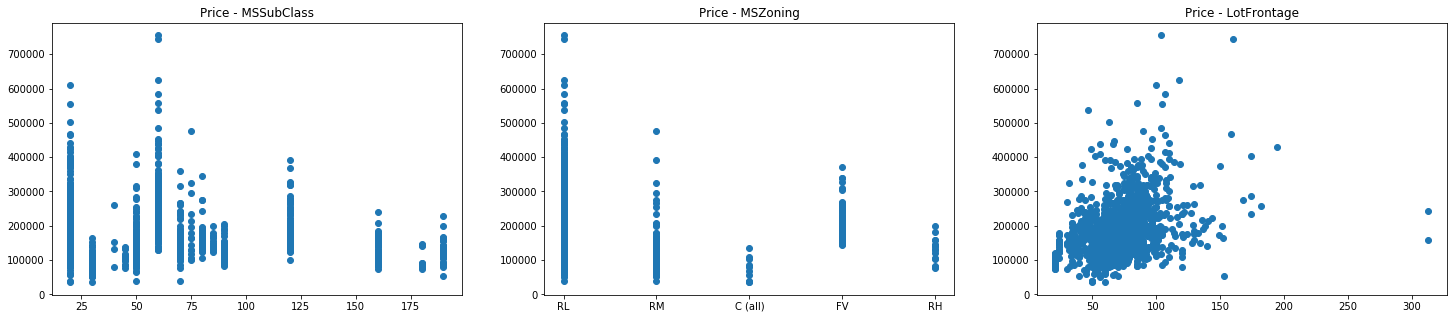

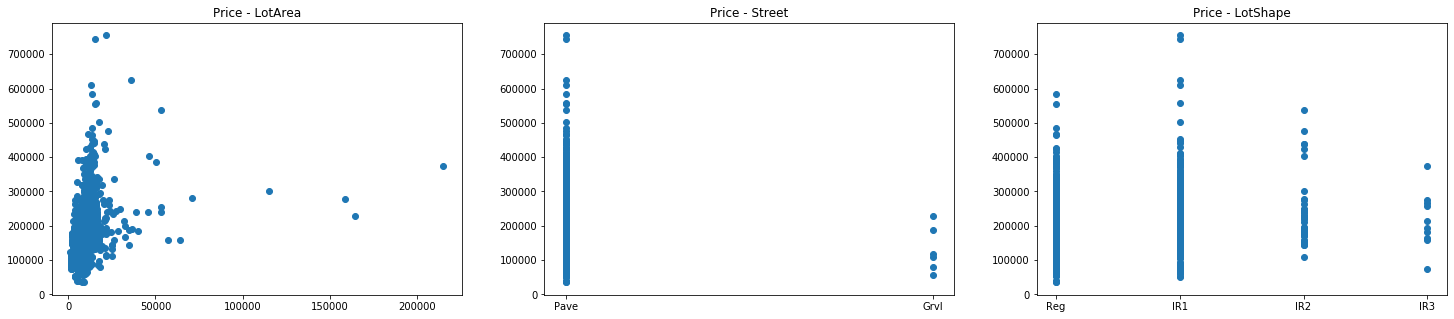

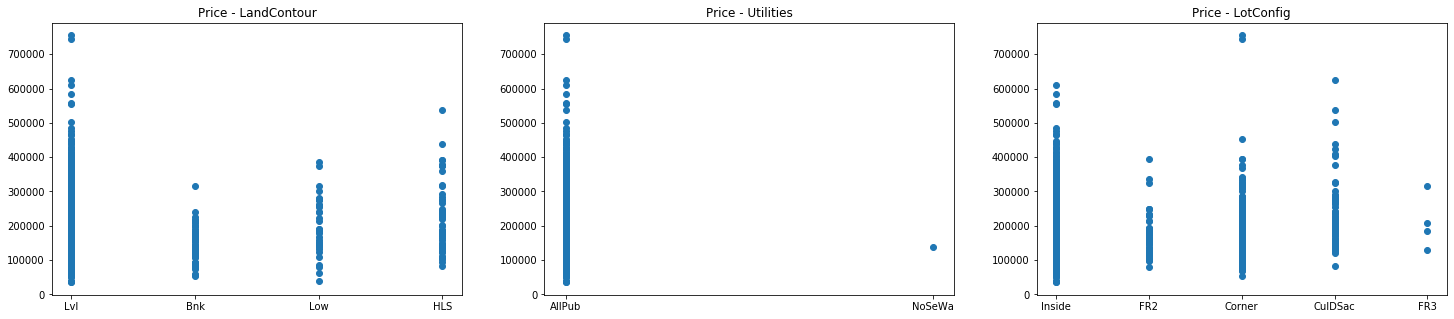

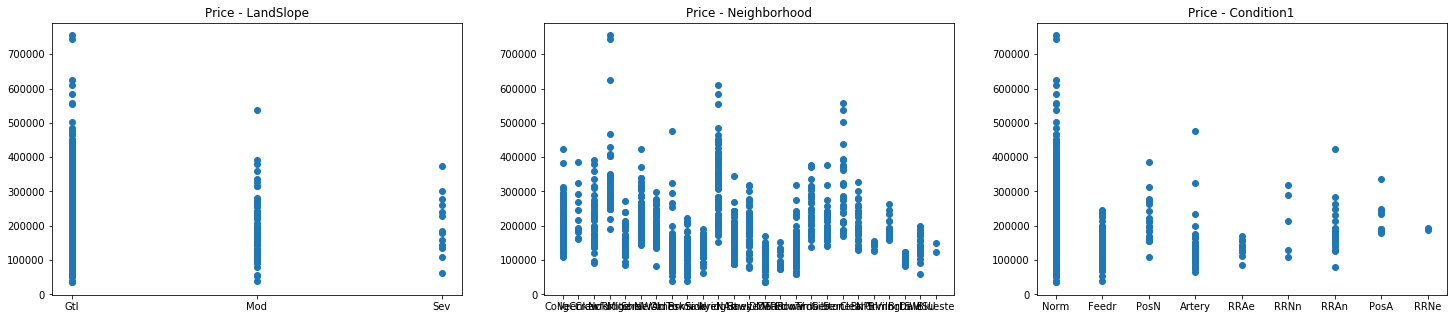

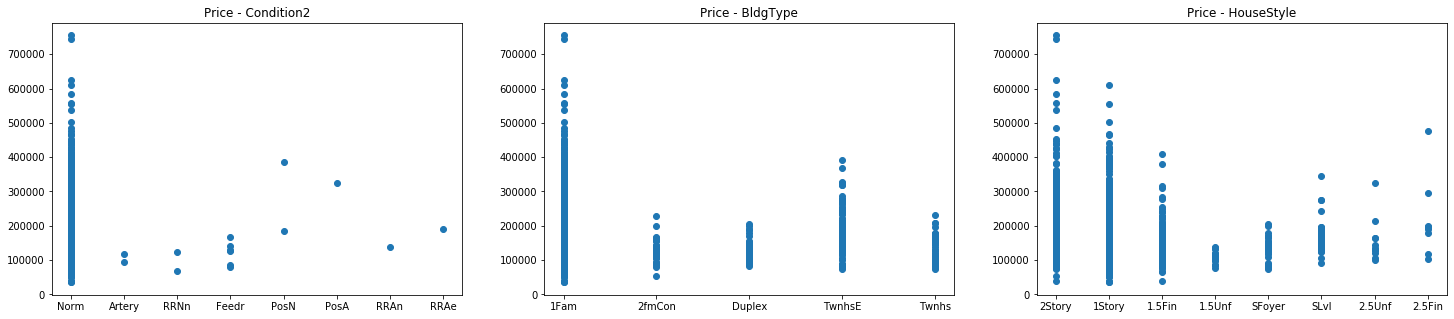

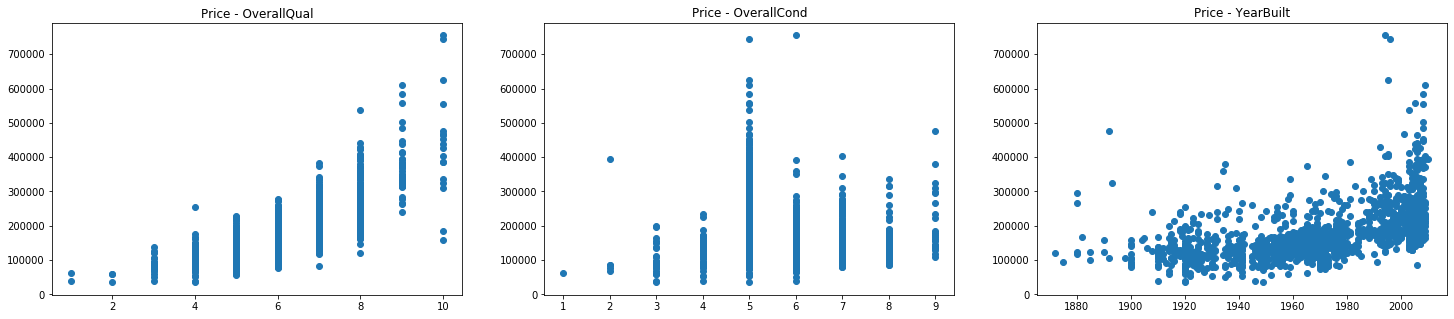

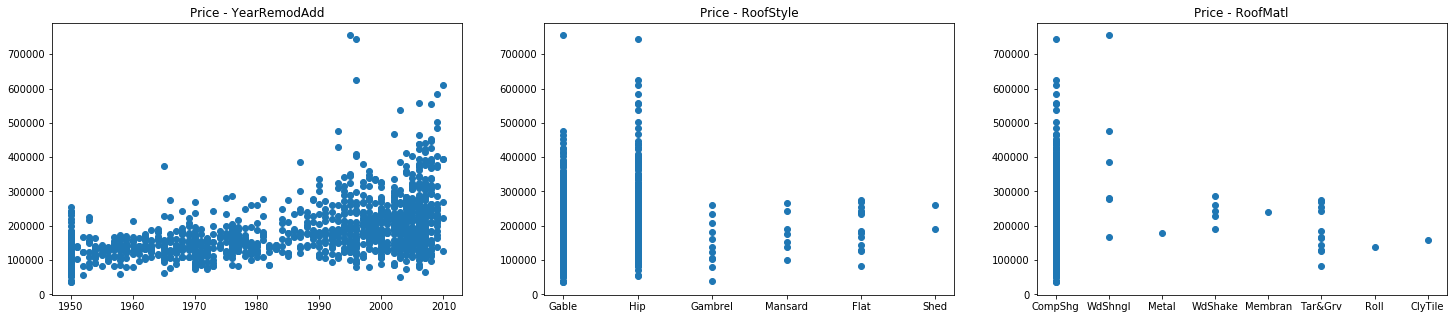

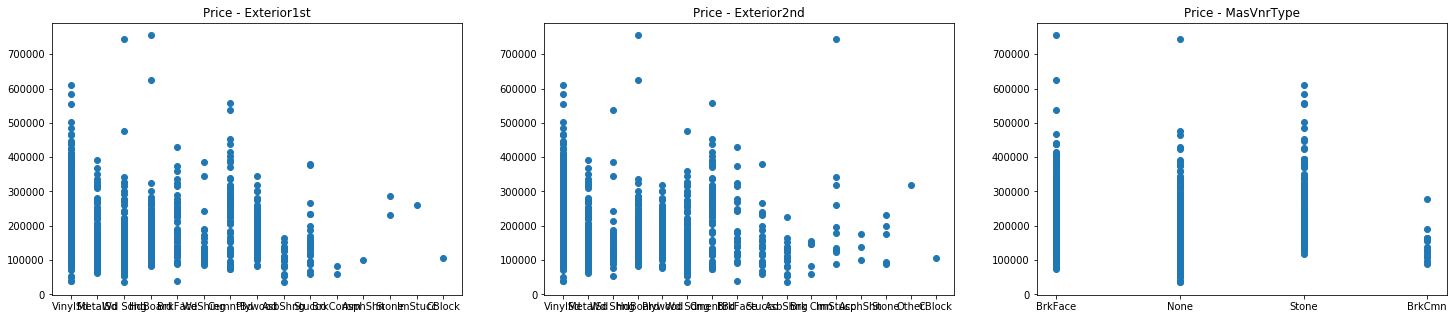

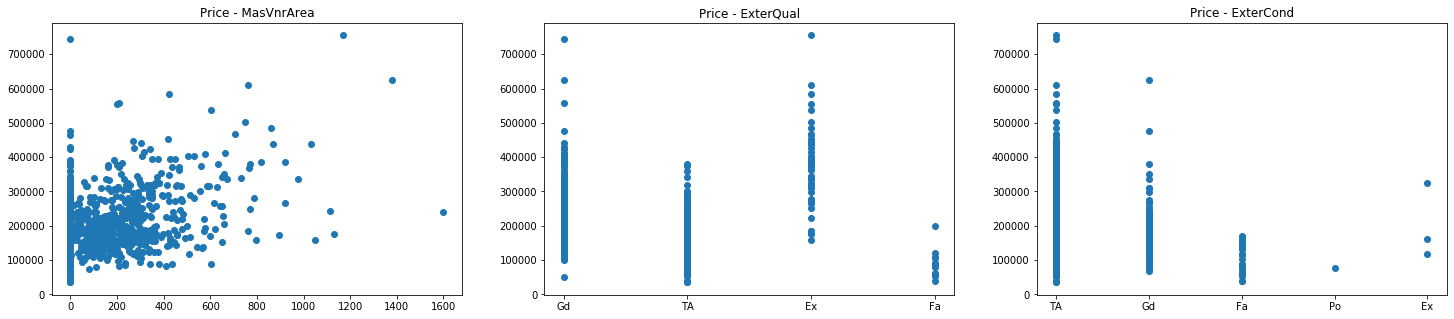

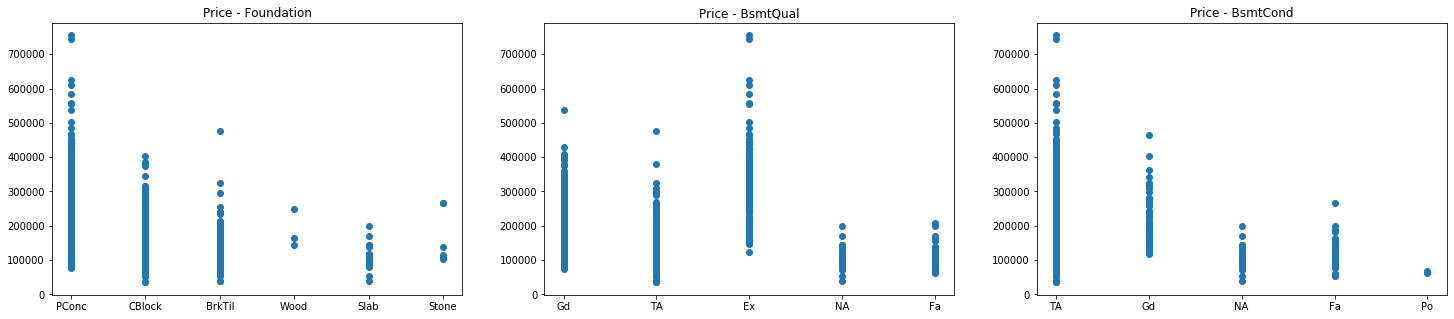

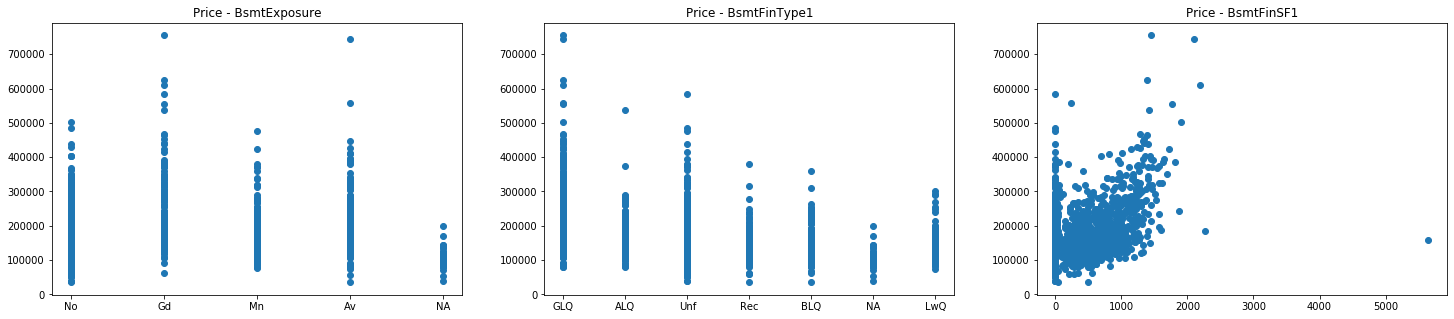

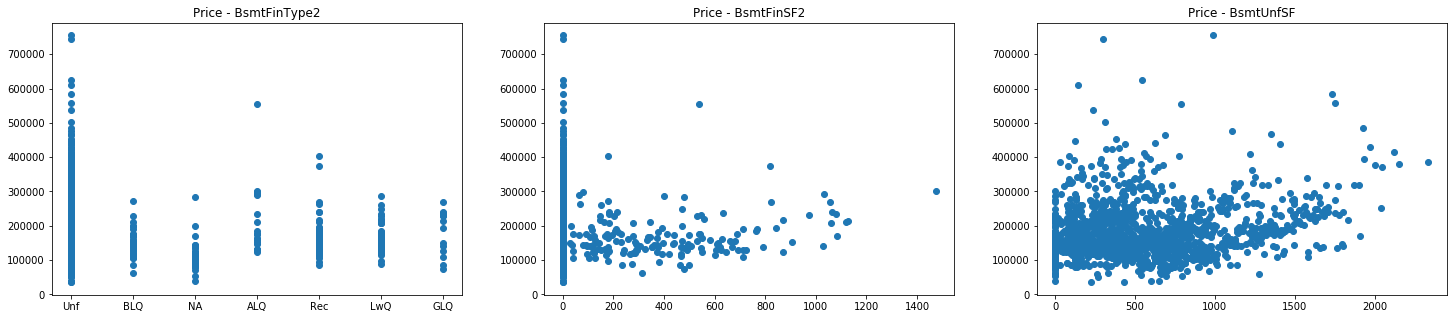

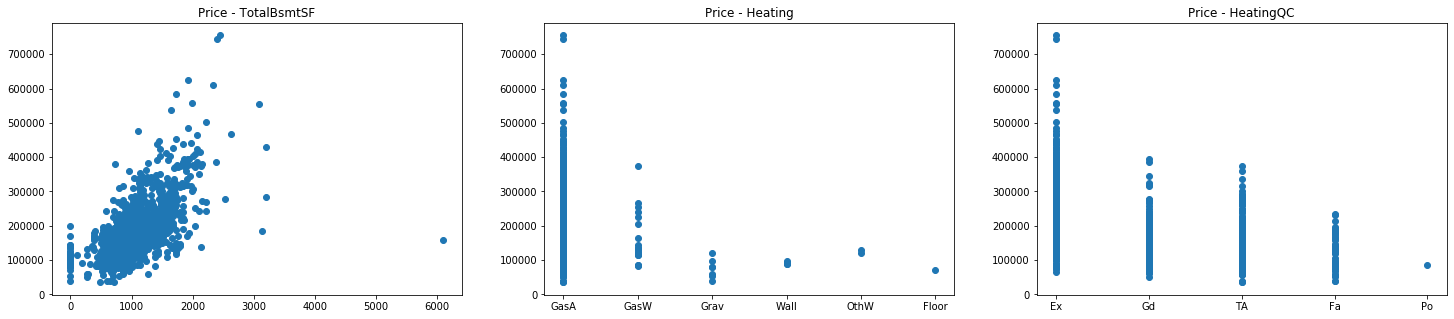

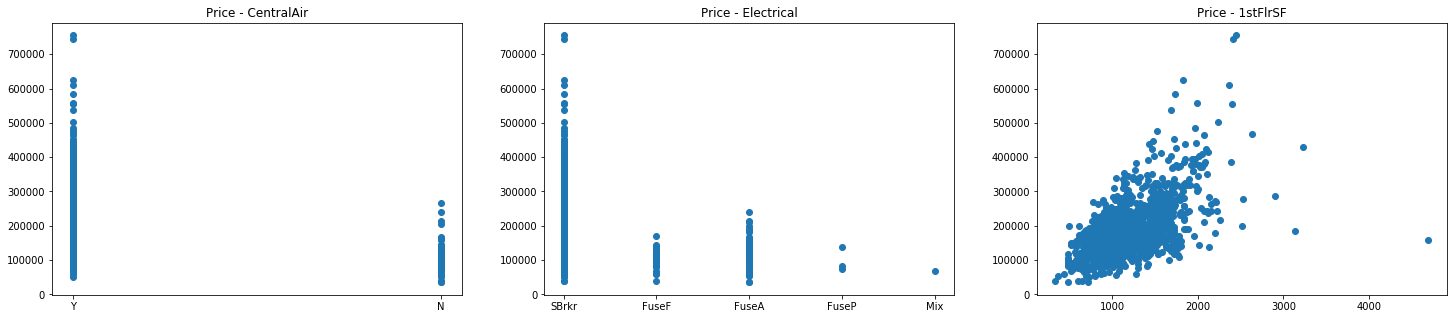

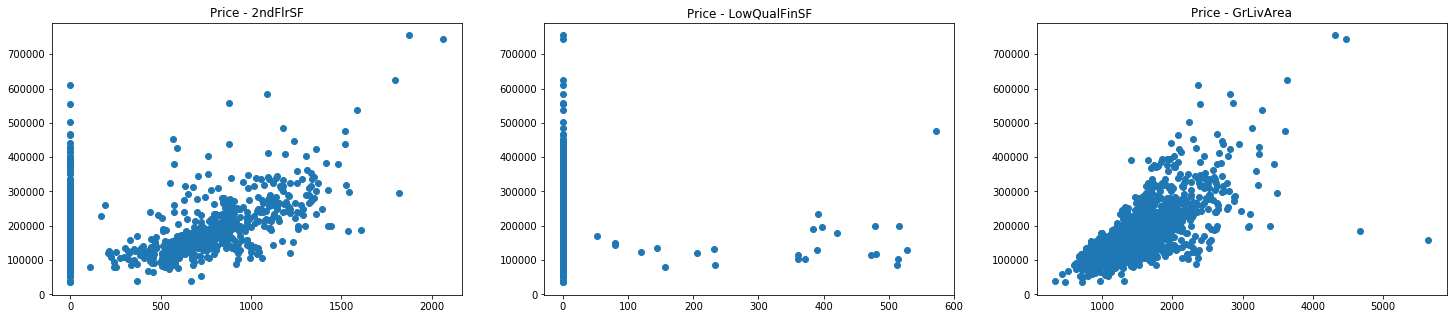

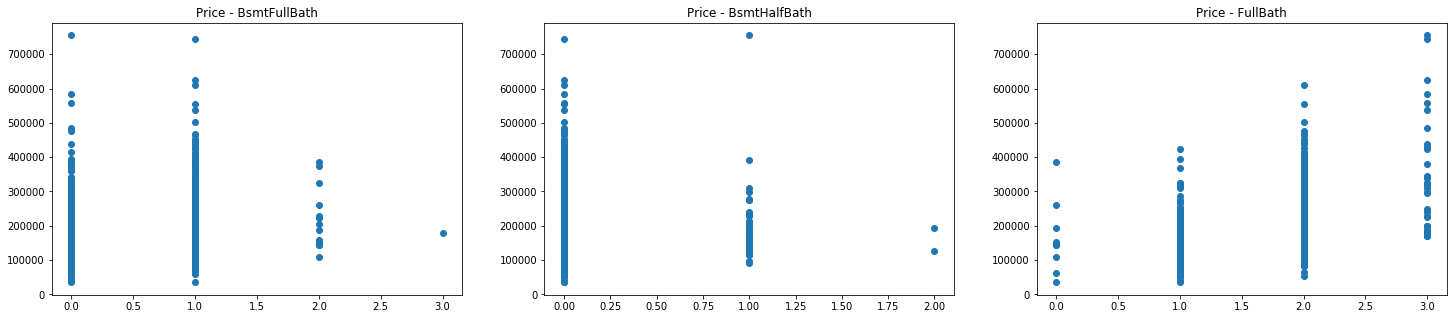

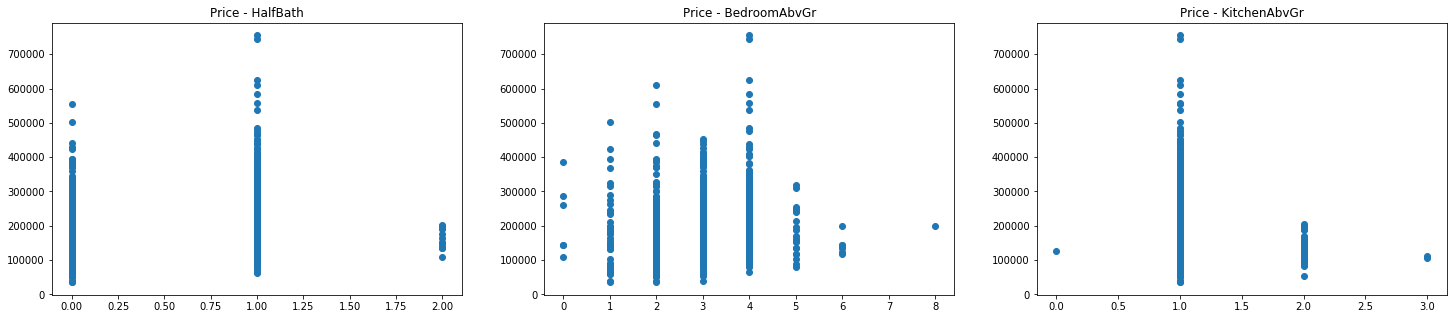

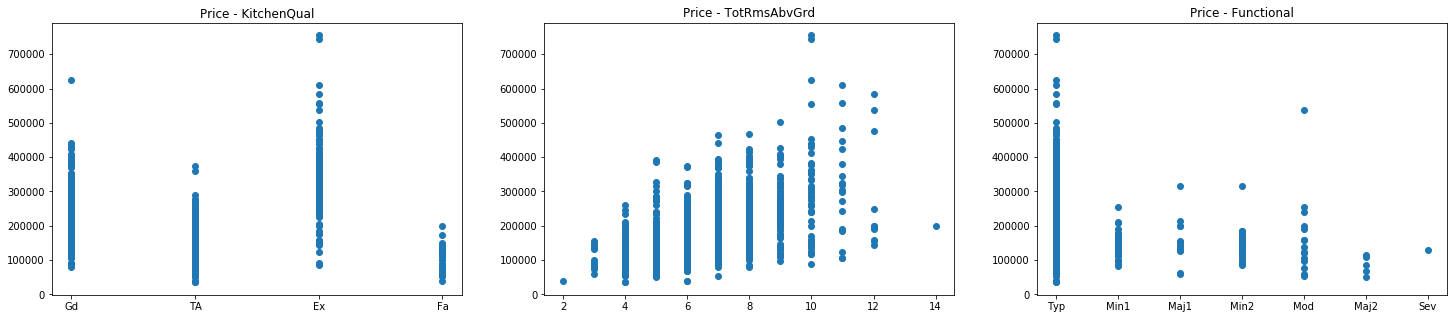

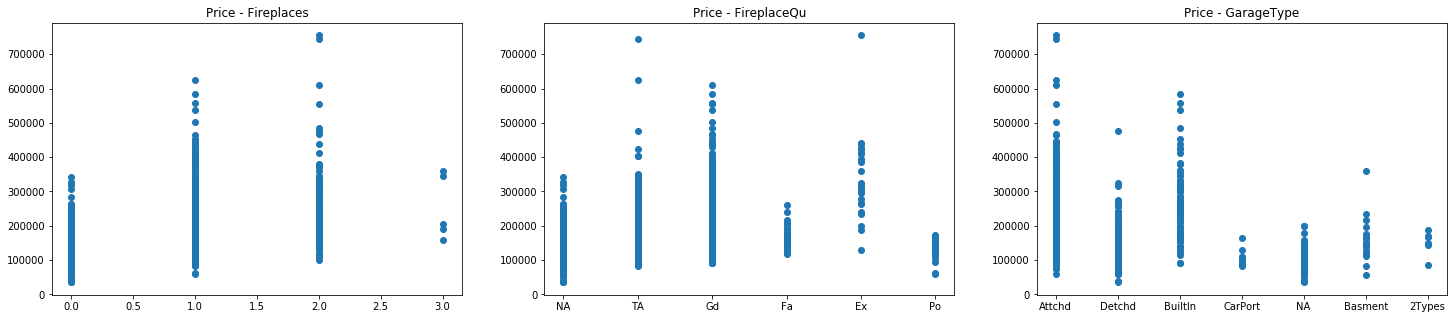

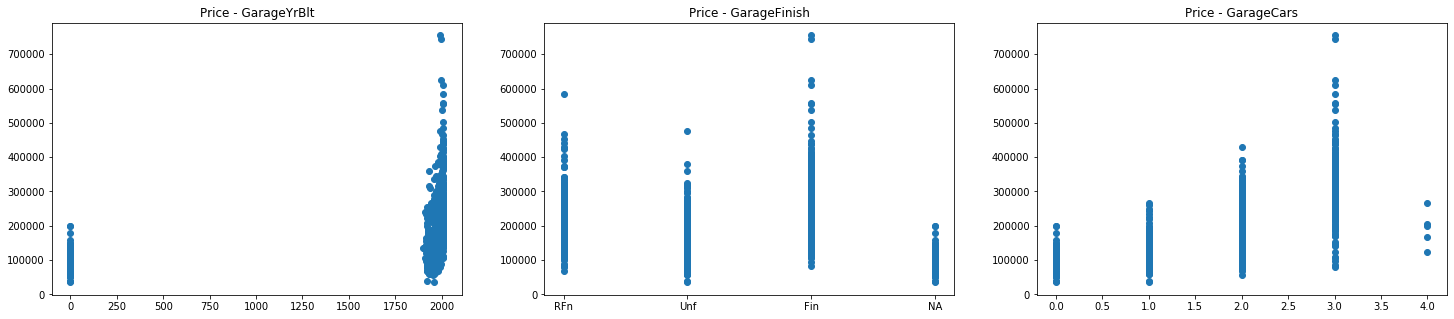

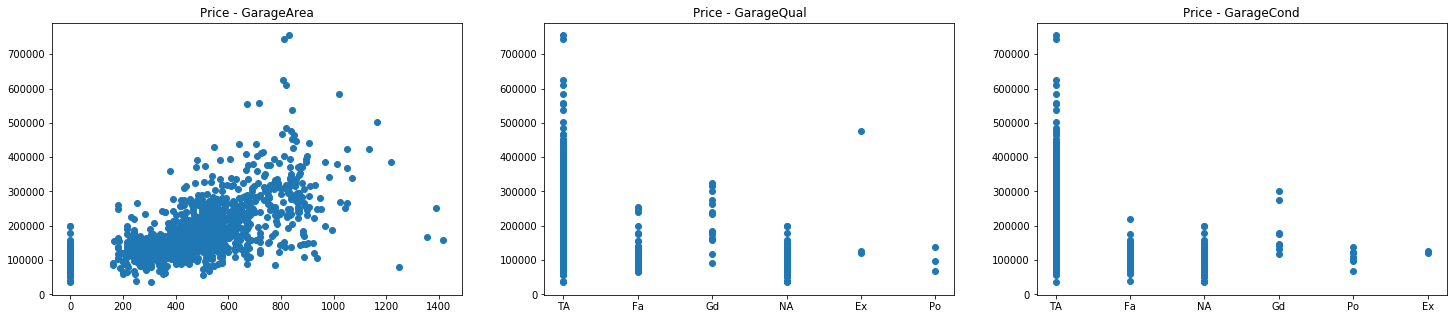

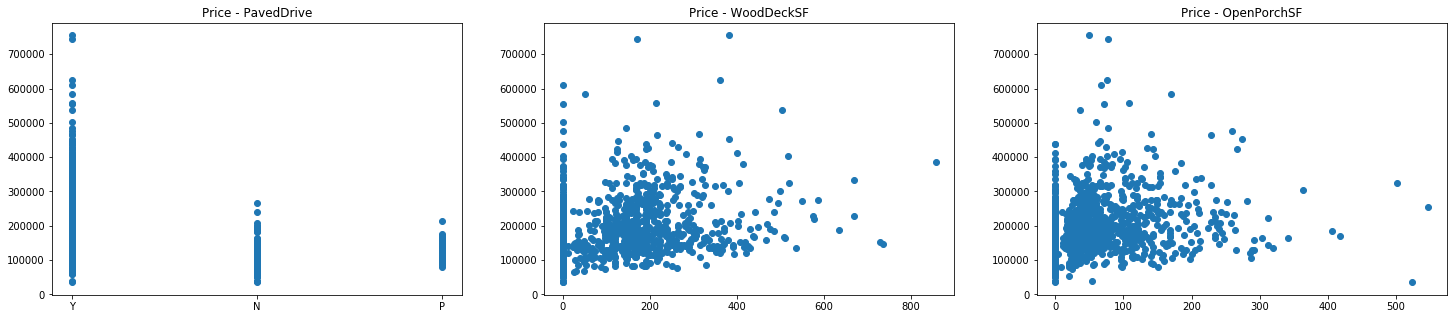

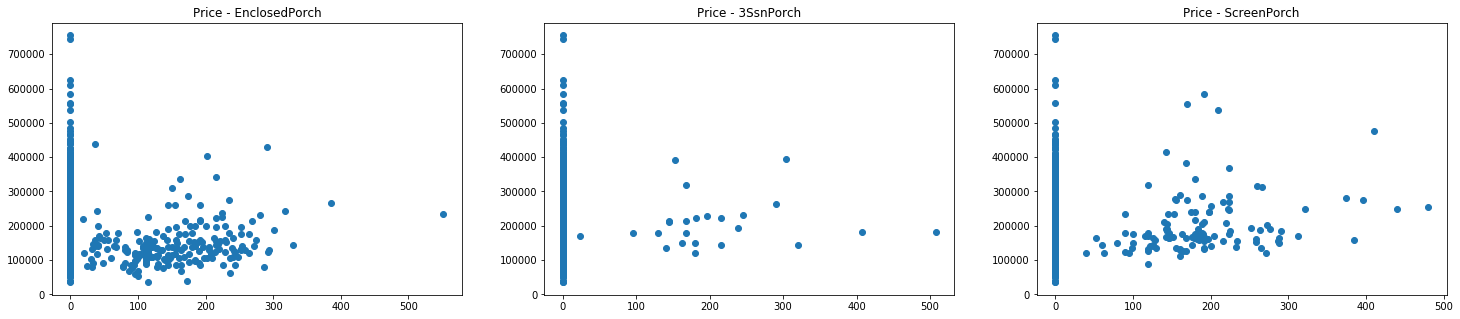

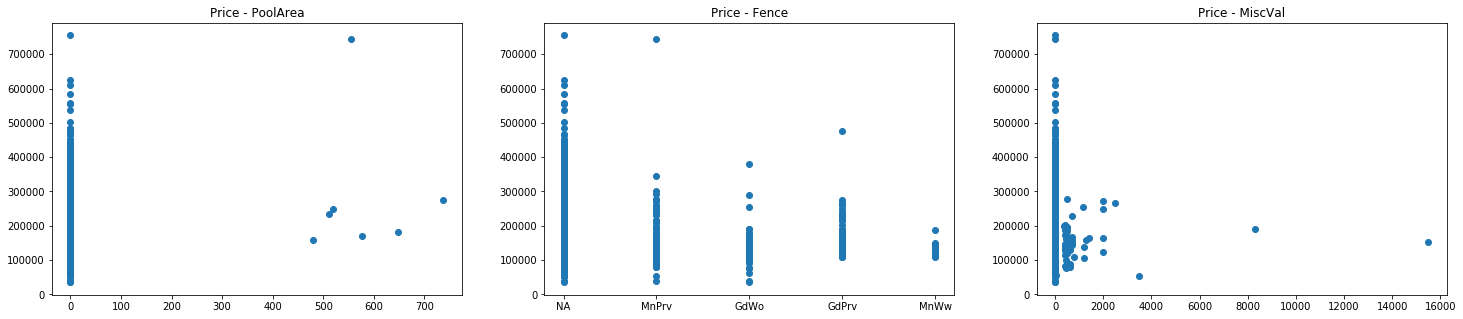

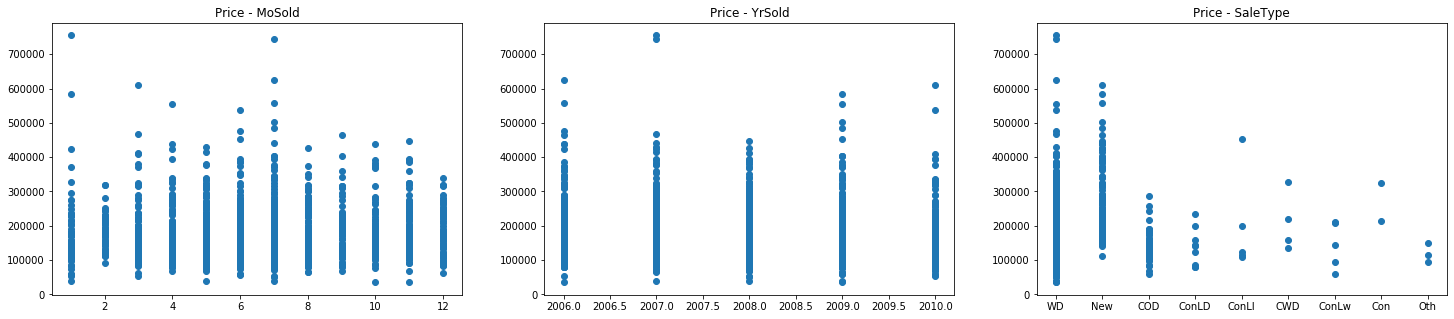

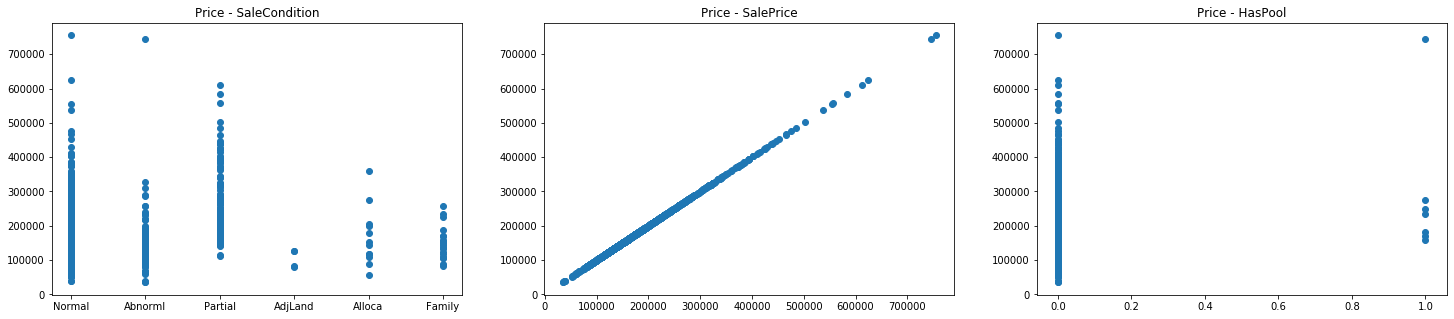

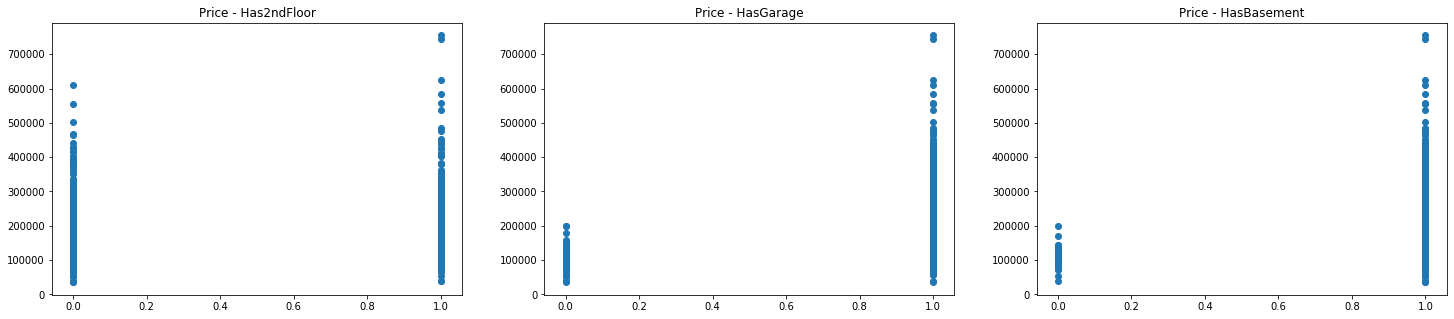

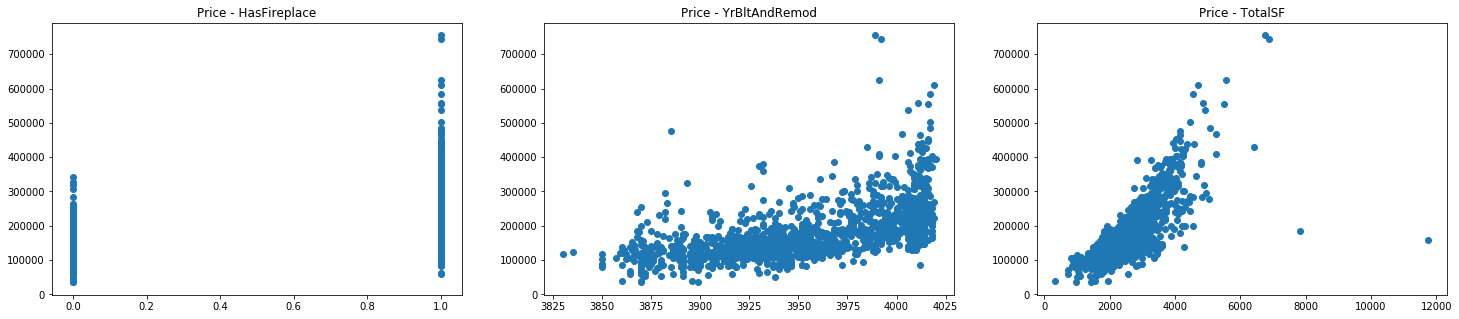

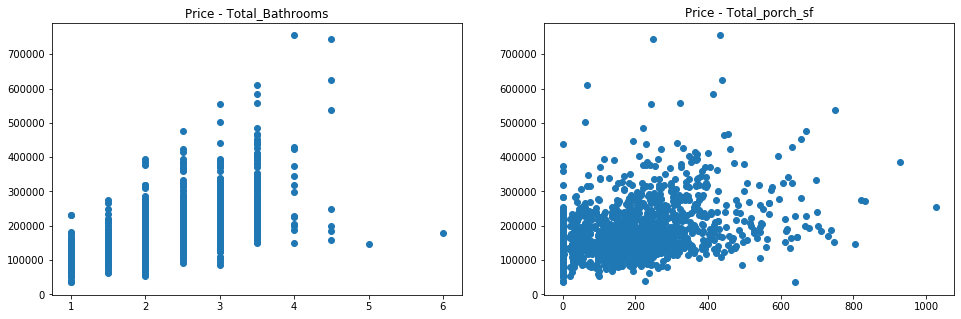

In [39]:
# Plots SalePrice - All other variables

figures_per_time = 3
count = 0 
y = data['SalePrice']

for col in data.columns:
    x = data[col]
    plt.figure(count//figures_per_time, figsize=(25, 5))
    plt.subplot(1, figures_per_time, np.mod(count, 3) + 1)
    plt.scatter(x, y);
    plt.title('Price - {}'.format(col))
    count += 1

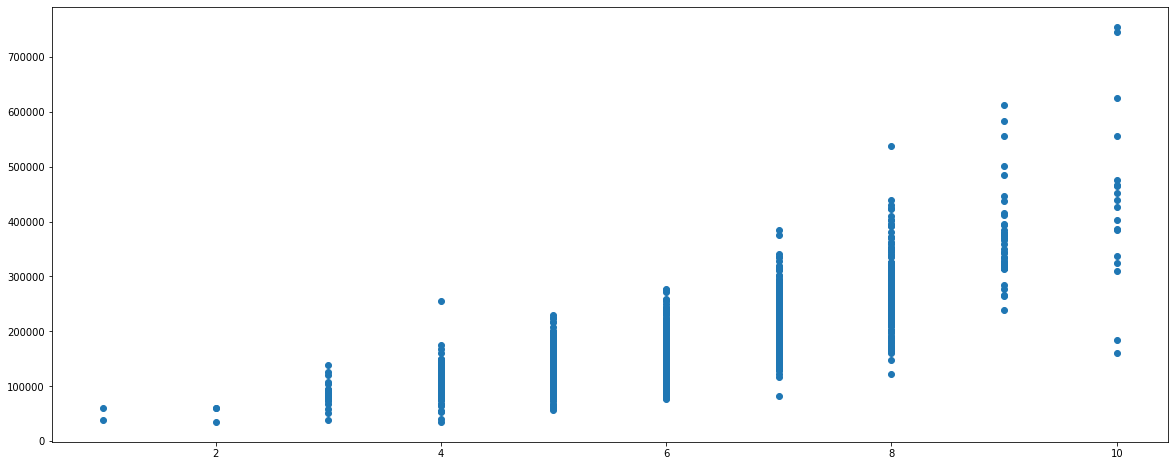

In [40]:
# Plot SalePrice - OverallQual

f, ax = plt.subplots(figsize=(20, 8))
plt.scatter(data['OverallQual'], data['SalePrice']);

In [41]:
# Outliers OverallQual

data[data['OverallQual'] <= 2].index

Int64Index([375, 533, 636, 916, 1100], dtype='int64')

In [42]:
data[(data['OverallQual'] == 4) & (data['SalePrice'] > 200000)].index

Int64Index([457], dtype='int64')

In [43]:
data[((data['OverallQual'] == 7) & (data['SalePrice'] > 370000)) | \
((data['OverallQual'] == 7) & (data['SalePrice'] < 100000))].index

Int64Index([112, 313, 632], dtype='int64')

In [44]:
data[((data['OverallQual'] == 8) & (data['SalePrice'] > 500000)) | \
((data['OverallQual'] == 8) & (data['SalePrice'] < 130000))].index

Int64Index([769, 1349], dtype='int64')

In [45]:
data[(data['OverallQual'] == 10) & (data['SalePrice'] < 200000)].index

Int64Index([523, 1298], dtype='int64')

In [46]:
# Outliers SalePrice

data[data['SalePrice'] > 600000].index

Int64Index([691, 898, 1169, 1182], dtype='int64')

In [47]:
data[data['SalePrice'] < 40000].index

Int64Index([495, 533, 916, 968], dtype='int64')

In [48]:
# Remove outliers

outliers = [375, 533, 636, 916, 1100, 457, 112, 313, 632, 769, 1349, 523, 1298, 691, 898, 1169, 1182, 
            495, 533, 916, 968]
data = data.drop(data.index[outliers])
data.reset_index(drop=True, inplace=True)

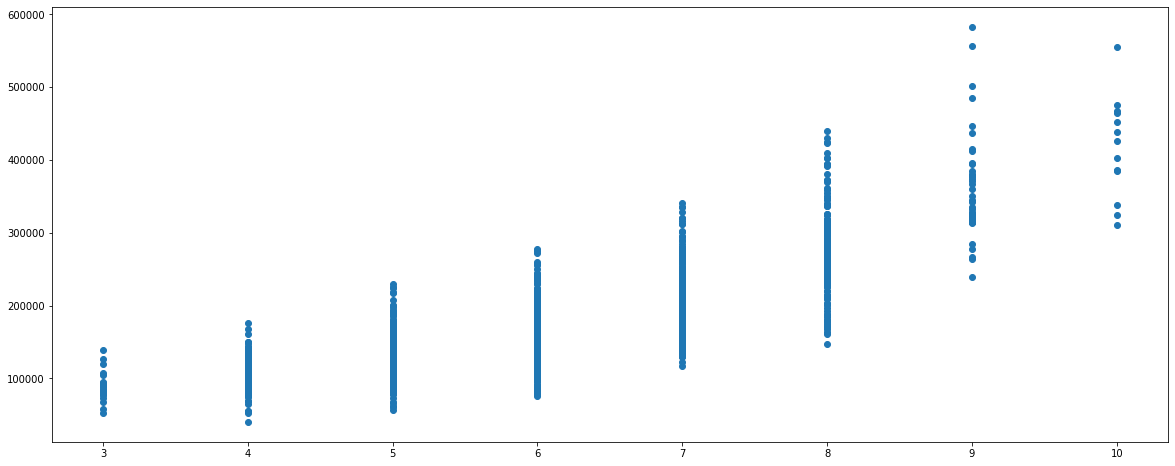

In [49]:
# Plot SalePrice - OverallQual

f, ax = plt.subplots(figsize=(20, 8))
plt.scatter(data['OverallQual'], data['SalePrice']);

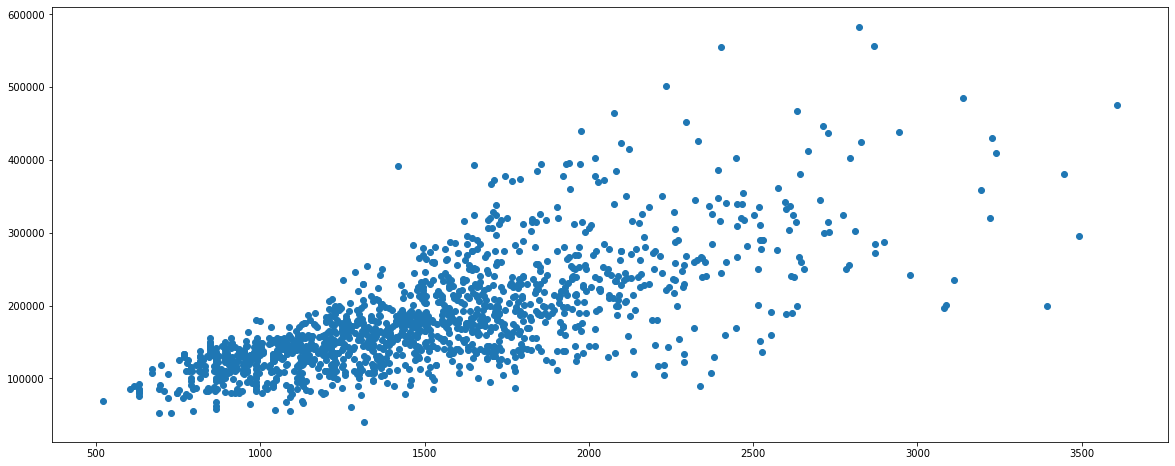

In [50]:
# Plot SalePrice - GrLivArea

f, ax = plt.subplots(figsize=(20, 8))
plt.scatter(data['GrLivArea'], data['SalePrice']);

In [51]:
# Outliers GrLivArea

outliers = data[(data['GrLivArea'] < 1700) & (data['SalePrice'] > 350000)].index

In [52]:
# Remove outliers

data = data.drop(data.index[outliers])
data.reset_index(drop=True, inplace=True)

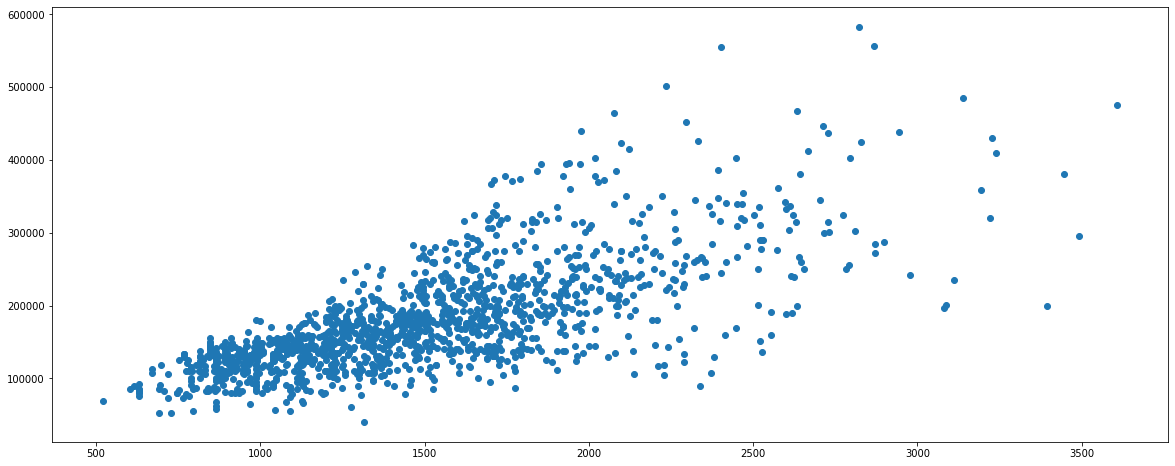

In [53]:
# Plot SalePrice - GrLivArea

f, ax = plt.subplots(figsize=(20, 8))
plt.scatter(data['GrLivArea'], data['SalePrice']);

In [54]:
# Check rows and columns quantity 

data.shape

(1439, 86)

In [55]:
# List of columns that are mostly (> 95%) have equal values

equals = []

for col in data.columns:
    count = data[col].value_counts()
    zeros = count.iloc[0]
    if zeros / len(data) * 100 > 95:
        equals.append(col)

equals = list(equals)
equals

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'HasPool',
 'HasBasement']

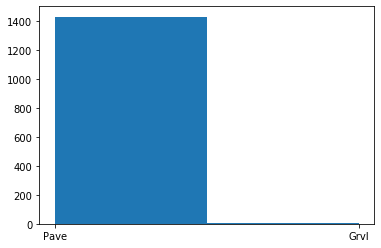

In [56]:
# Histogram of columns values that are mostly (> 90%) equal each other

plt.hist(data['Street'], bins=2);

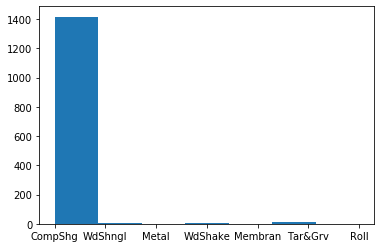

In [57]:
plt.hist(data['RoofMatl'], bins=7);

In [58]:
# # Remove columns that are mostly have equal values

# data.drop(equals, axis=1, inplace=True)

In [59]:
# Information about dataset - quantity of non-null values and types of data by columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 86 columns):
MSSubClass         1439 non-null int64
MSZoning           1439 non-null object
LotFrontage        1439 non-null float64
LotArea            1439 non-null int64
Street             1439 non-null object
LotShape           1439 non-null object
LandContour        1439 non-null object
Utilities          1439 non-null object
LotConfig          1439 non-null object
LandSlope          1439 non-null object
Neighborhood       1439 non-null object
Condition1         1439 non-null object
Condition2         1439 non-null object
BldgType           1439 non-null object
HouseStyle         1439 non-null object
OverallQual        1439 non-null int64
OverallCond        1439 non-null int64
YearBuilt          1439 non-null int64
YearRemodAdd       1439 non-null int64
RoofStyle          1439 non-null object
RoofMatl           1439 non-null object
Exterior1st        1439 non-null object
Exterior2nd       

### Adjusting SalePrice

In [60]:
# House Price Indexes (Seasonally Adjusted) January 2006 - December 2010
# from https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx
# U.S. and Census Division (Seasonally Adjusted and Unadjusted) January 1991 - Latest Month

price_coefficients = pd.DataFrame([
    [210.09, 210.21, 210.75, 210.83, 211.25, 211.42, 212.11, 212.50, 212.11, 211.96, 213.46, 211.70],
    [213.47, 215.13, 215.08, 214.55, 214.35, 213.59, 214.09, 212.79, 214.26, 209.88, 211.50, 211.18],
    [209.61, 208.60, 209.09, 207.95, 205.98, 205.62, 204.99, 204.59, 202.86, 202.79, 199.02, 201.05],
    [202.66, 204.19, 200.76, 201.31, 201.02, 200.98, 200.40, 200.18, 199.92, 200.54, 201.16, 198.99],
    [197.21, 198.44, 198.74, 199.72, 200.49, 198.67, 194.88, 196.28, 194.79, 194.22, 193.65, 193.04]
])

In [61]:
# Current House Price Index (for August 2019)

price_coef_current = 274.52

In [62]:
# Coefficients of conversion to current prices

price_coefs_conv = price_coef_current / price_coefficients
price_coefs_conv.T

,0,1,2,3,4
0,1.306678,1.285989,1.309670,1.354584,1.392019
1,1.305932,1.276066,1.316012,1.344434,1.383390
2,1.302586,1.276362,1.312927,1.367404,1.381302
3,1.302092,1.279515,1.320125,1.363668,1.374524
4,1.299503,1.280709,1.332751,1.365635,1.369245
5,1.298458,1.285266,1.335084,1.365907,1.381789
6,1.294234,1.282264,1.339187,1.369860,1.408662
7,1.291859,1.290098,1.341806,1.371366,1.398614
8,1.294234,1.281247,1.353249,1.373149,1.409313
9,1.295150,1.307986,1.353716,1.368904,1.413449


In [63]:
# Change prices according to appropriate ratios

for i in range (len(data)):
    data['SalePrice'][i] = data['SalePrice'][i] * \
    price_coefs_conv[data['MoSold'][i] - 1][data['YrSold'][i] - 2006]

In [64]:
# Remove columns MoSold and YrSold because they don't make sense for future sales

data.drop('MoSold', axis=1, inplace=True)
data.drop('YrSold', axis=1, inplace=True)


 mu = 238412.04 and sigma = 97557.80



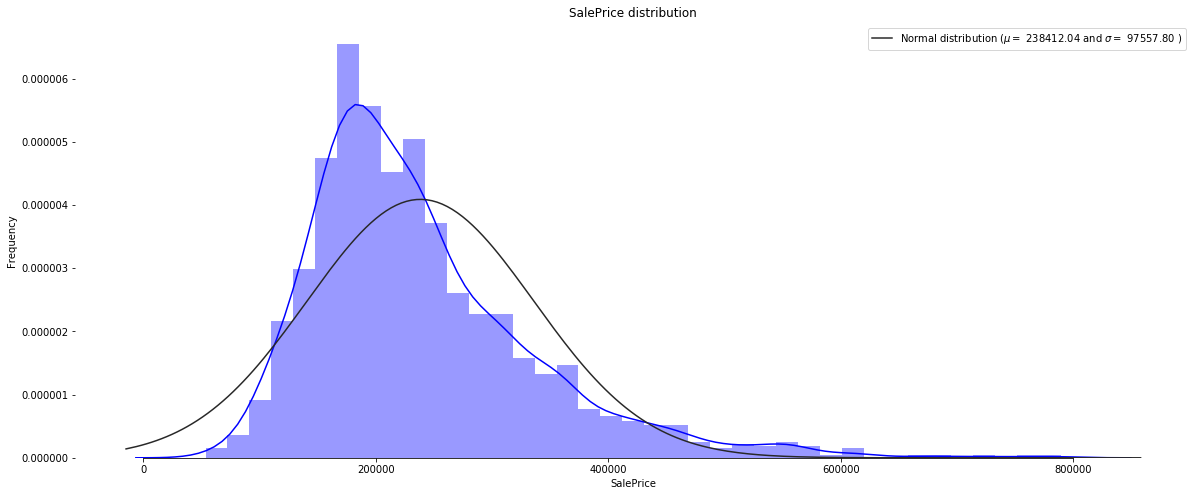

In [65]:
# Distribution of SalePrice

f, ax = plt.subplots(figsize=(20, 8))
sns.distplot(data['SalePrice'], fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='SalePrice distribution')
sns.despine(trim=True, left=True)

plt.show()

In [66]:
# log(1+x) transformation of 'SalePrice'

data['SalePrice'] = np.log1p(data['SalePrice'])


 mu = 12.31 and sigma = 0.38



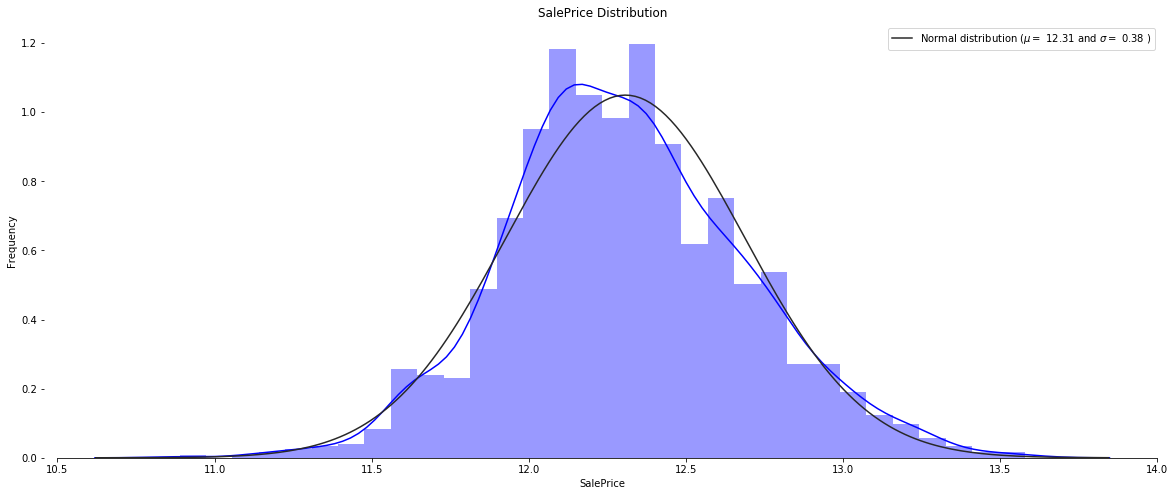

In [67]:
# Distribution of SalePrice

f, ax = plt.subplots(figsize=(20, 8))
sns.distplot(data['SalePrice'], fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='SalePrice')
ax.set(title='SalePrice Distribution')
sns.despine(trim=True, left=True)

plt.show()

In [68]:
# Quantative columns names

quan_column_names = []

for col in data.columns.values:
    if data[col].dtype != 'object':
        quan_column_names.append(col)
        
quan_column_names.remove('SalePrice')

quan_column_names

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'HasPool',
 'Has2ndFloor',
 'HasGarage',
 'HasBasement',
 'HasFireplace',
 'YrBltAndRemod',
 'TotalSF',
 'Total_Bathrooms',
 'Total_porch_sf']

In [69]:
# Skew index
        
skew_data = data[quan_column_names].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_data[skew_data > 0.5]
skew_index = high_skew.index

for i in skew_index:
    data[i] = boxcox1p(data[i], boxcox_normmax(data[i] + 1))

In [70]:
# log(1+x) transformation for other columns

for col in quan_column_names:
    data[col] = np.log1p(data[col])

In [71]:
# Qualitative columns names

qual_col_names = []

for col in data.columns.values:
    if data[col].dtype == 'object':
        qual_col_names.append(col)
        
qual_col_names

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [72]:
# Replace some qualitative variables by quantative values

qual_col_names_scale = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
                        'GarageQual', 'GarageCond']

for col in qual_col_names_scale:
    data.loc[data[col] == 'Ex', col] = 5
    data.loc[data[col] == 'Gd', col] = 4
    data.loc[data[col] == 'TA', col] = 3
    data.loc[data[col] == 'Fa', col] = 2
    data.loc[data[col] == 'Po', col] = 1
    data.loc[data[col] == 'NA', col] = 0

In [73]:
# Generate dummies

data = pd.get_dummies(data)

In [74]:
# Information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Columns: 260 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(44), int64(9), uint8(207)
memory usage: 886.9 KB


In [75]:
# First five rows of dataset

data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HasPool,Has2ndFloor,HasGarage,HasBasement,HasFireplace,YrBltAndRemod,TotalSF,Total_Bathrooms,Total_porch_sf,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,

In [76]:
# Description of dataset

data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HasPool,Has2ndFloor,HasGarage,HasBasement,HasFireplace,YrBltAndRemod,TotalSF,Total_Bathrooms,Total_porch_sf,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,

In [77]:
# Create list of columns names

feats = data.columns.values.tolist()
feats.remove('SalePrice')
feats

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'HasPool',
 'Has2ndFloor',
 'HasGarage',
 'HasBasement',
 'HasFireplace',
 'YrBltAndRemod',
 'TotalSF',
 'Total_Bathrooms',
 'Total_porch_sf',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandC

### Splitting training dataset

In [78]:
train, test = train_test_split(data, test_size=0.2, random_state=15)
train.shape, test.shape

((1151, 260), (288, 260))

### Training and evaluating models

#### Setup Cross Validation

In [79]:
# KFold parameters for evaluating models

kf = KFold(n_splits=5, random_state=42)

#### Decision Tree Regression

In [80]:
# List of columns names which will be used to train the model

feats_dtr = feats

In [81]:
# Create regressor

dtr = DecisionTreeRegressor(max_depth=7, random_state=15)

In [82]:
# Train the model

dtr.fit(train.loc[:, feats_dtr], train['SalePrice'])

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=15, splitter='best')

In [83]:
# Prediction for training dataset

pred_dtr_train = dtr.predict(train.loc[:, feats_dtr])

In [84]:
# Check r2 for training dataset

r2(train['SalePrice'], pred_dtr_train)

0.9372178302918628

In [85]:
# Prediction for testing dataset

pred_dtr_test = dtr.predict(test.loc[:, feats_dtr])

In [86]:
# Check r2 for testing dataset

r2(test['SalePrice'], pred_dtr_test)

0.754187842610458

In [87]:
# Model validation

scores_dt = cross_val_score(dtr, data.loc[:, feats_dtr], data['SalePrice'], cv=kf)
print(scores_dt)
print(scores_dt.mean())

[0.77067112 0.79638654 0.80284241 0.7786685  0.73996913]
0.7777075390824549


In [88]:
# # Export the decision tree to a tree.dot file for visualizing (for example on http://webgraphviz.com/)

# export_graphviz(dtr, out_file='tree.dot', feature_names=feats_dtr)

#### Random Forest Regression

In [89]:
# List of columns names which will be used to train the model

feats_rfr = feats

In [90]:
# for i in range(231, 250, 1):
#     for j in range(15, 16, 1):
#         rfr = RandomForestRegressor(n_estimators=i, max_depth=j, random_state=42)
#         rfr.fit(train.loc[:, feats_rfr], train['SalePrice'])
#         pred_rfr_test = rfr.predict(test.loc[:, feats_rfr])
#         print(i, j, r2(test['SalePrice'], pred_rfr_test))

In [91]:
# Create regressor

rfr = RandomForestRegressor(n_estimators=238, max_depth=15, random_state=15)

In [92]:
# Train the model

rfr.fit(train.loc[:, feats_rfr], train['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=238,
                      n_jobs=None, oob_score=False, random_state=15, verbose=0,
                      warm_start=False)

In [93]:
# Prediction for training dataset

pred_rfr_train = rfr.predict(train.loc[:, feats_rfr])

In [94]:
# Check r2 for training dataset

r2(train['SalePrice'], pred_rfr_train)

0.9842014789641362

In [95]:
# Prediction for testing dataset

pred_rfr_test = rfr.predict(test.loc[:, feats_rfr])

In [96]:
# Check r2 for testing dataset

r2(test['SalePrice'], pred_rfr_test)

0.8821676249907121

In [97]:
# Model validation

scores_rfr = cross_val_score(rfr, data.loc[:, feats_rfr], data['SalePrice'], cv=kf)
print(scores_rfr)
print(scores_rfr.mean())

[0.87507192 0.90450339 0.88726257 0.88884857 0.86323187]
0.8837836630877595


#### Gradient Boosting Regression

In [98]:
# List of columns names which will be used to train the model

feats_gbr = feats

In [99]:
# for i in range(842, 843, 1):
#     for j in range(3, 4):
#         for k in range(15, 16, 1):
#             for l in range(10, 11, 1):
#                 for m in range(3, 6):
#                     gbr = GradientBoostingRegressor(n_estimators=i, learning_rate=m/100, max_depth=j, \
#                                                     max_features='sqrt', min_samples_leaf=k, min_samples_split=l, \
#                                                     loss='huber', random_state=42) 
#                     gbr.fit(train.loc[:, feats_gbr], train['SalePrice'])
#                     pred_gbr_test = gbr.predict(test.loc[:, feats_gbr])
#                     print(i, m/100, j, k, l, r2(test['SalePrice'], pred_gbr_test))

In [100]:
# Create regressor

gbr = GradientBoostingRegressor(n_estimators=842, learning_rate=0.04, max_depth=3, \
                                max_features='sqrt', min_samples_leaf=15, min_samples_split=10, \
                                loss='huber', random_state=15)

In [101]:
# Train the model

gbr.fit(train.loc[:, feats_gbr], train['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.04, loss='huber', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=842,
                          n_iter_no_change=None, presort='auto',
                          random_state=15, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
# Prediction for training dataset

pred_gbr_train = gbr.predict(train.loc[:, feats_gbr])

In [103]:
# Check r2 for training dataset

r2(train['SalePrice'], pred_gbr_train)

0.9622143870672892

In [104]:
# Prediction for testing dataset

pred_gbr_test = gbr.predict(test.loc[:, feats_gbr])

In [105]:
# Check r2 for testing dataset

r2(test['SalePrice'], pred_gbr_test)

0.9255556427883083

In [106]:
# Model validation

scores_gbr = cross_val_score(gbr, data.loc[:, feats_gbr], data['SalePrice'], cv=kf)
print(scores_gbr)
print(scores_gbr.mean())

[0.92153578 0.92593862 0.92462282 0.92226709 0.90072517]
0.9190178966080731


#### Blend Model

In [107]:
# r2max = i_opt = j_opt = 0

# for i in range(0, 101):
#     for j in range(0, 101):
#         if (j >= i) & (i+j <= 100):
#             blended_predictions = i/100 * pred_dtr_test + (j-i)/100 * pred_rfr_test + (100-i-j)/100 * pred_gbr_test
#             r2_curr = r2(test['SalePrice'], blended_predictions)
#             # print(i/100, j/100, (100-i-j)/100, r2(test['SalePrice'], blended_predictions))
#             if r2max < r2_curr:
#                 r2max = r2_curr
#                 i_opt = i
#                 j_opt = j

# print(i_opt/100, j_opt/100, (100-i_opt-j_opt)/100, r2max)
#
# 0.0 0.04 0.96 0.9256509411686783

In [108]:
# Blend model allows to make predictions more robust to overfitting

blended_predictions = 0.03 * pred_dtr_test + 0.13 * pred_rfr_test + 0.84 * pred_gbr_test

In [109]:
r2(test['SalePrice'], blended_predictions)

0.9243170271453779

### Saving predictions

In [110]:
# Saving predictions into test dataset

test['SalePrice'] = np.floor(np.expm1(test['SalePrice']))
test['PredictedPriceDT'] = np.floor(np.expm1(pred_dtr_test))
test['PredictedPriceRF'] = np.floor(np.expm1(pred_rfr_test))
test['PredictedPriceGB'] = np.floor(np.expm1(pred_gbr_test))
test['PredictedPriceBM'] = np.floor(np.expm1(blended_predictions))

In [111]:
# Saving predictions into file

test.loc[:, ['SalePrice', 'PredictedPriceDT', 'PredictedPriceRF', 'PredictedPriceGB', \
             'PredictedPriceBM']].to_csv('predictions.csv', index=None)

### Visualization of results

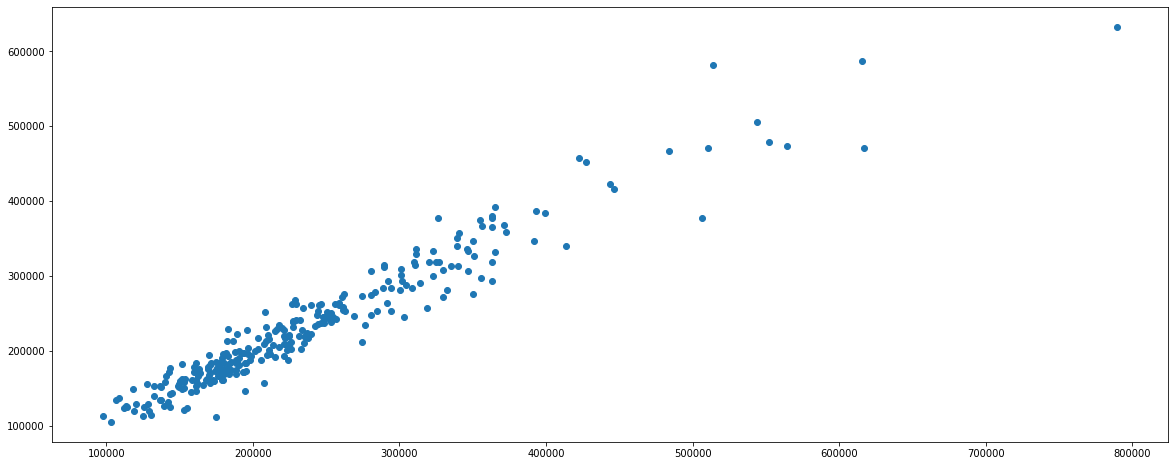

In [112]:
f, ax = plt.subplots(figsize=(20, 8))
plt.scatter(test['SalePrice'], test['PredictedPriceBM']);

(array([ 8., 10., 17., 48., 73., 78., 32.,  9.,  9.,  3.,  1.]),
 array([-25.9805861 , -20.36692783, -14.75326957,  -9.13961131,
         -3.52595304,   2.08770522,   7.70136348,  13.31502175,
         18.92868001,  24.54233827,  30.15599654,  35.7696548 ]),
 <a list of 11 Patch objects>)

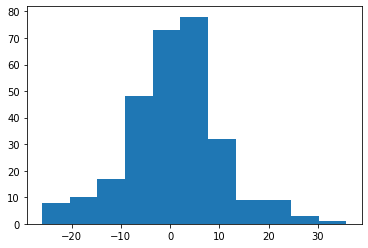

In [113]:
plt.hist(100*(test['SalePrice'] - test['PredictedPriceBM'])/test['SalePrice'], bins=11)

In [114]:
# Suggestions for personal presentations:

# Code (done)
# Coefficients of real estate prices for the period 2006 - 2010 and 2019 (done)
# Additional information - Why neighborhoods mean prices/sq_feet are different?
# Additional columns
# Outliers
# Columns whith mostly equal values
# Decision Tree Regression + Random Forest
# Gradient Boosting Regression
# KFold cross validation
# Skew_index
# Box Cox transformation
# Vizualization in Excel
# Business Model